# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing opencv-python package to import cv2
#!pip install opencv-python

In [4]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing cv2 for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.layers import Input,Rescaling,Resizing                                     # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from keras.applications import VGG16,ResNet50,InceptionV3,DenseNet121,EfficientNetB0

from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [5]:
# Loading the images & labels files
images = np.load('images.npy')
labels = pd.read_csv('Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
#Printing the shape of the data.
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


#### Observations
* The input digitized images file seems to contain **4750** color images (**3** channels) with **128x128** pixels.
* The target label for each of those images are in labels file which also contains **4750** labels in it over **1** channel.

#### Identifying Distinct Labels

In [7]:
pd.DataFrame(labels['Label'].unique())

,0
0,Small-flowered Cranesbill
1,Fat Hen
2,Shepherds Purse
3,Common wheat
4,Common Chickweed
5,Charlock
6,Cleavers
7,Scentless Mayweed
8,Sugar beet
9,Maize


#### Observations
* There are 12 distinct labels in our dataset, which means the images file contains images of 12 different varieties of plants.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

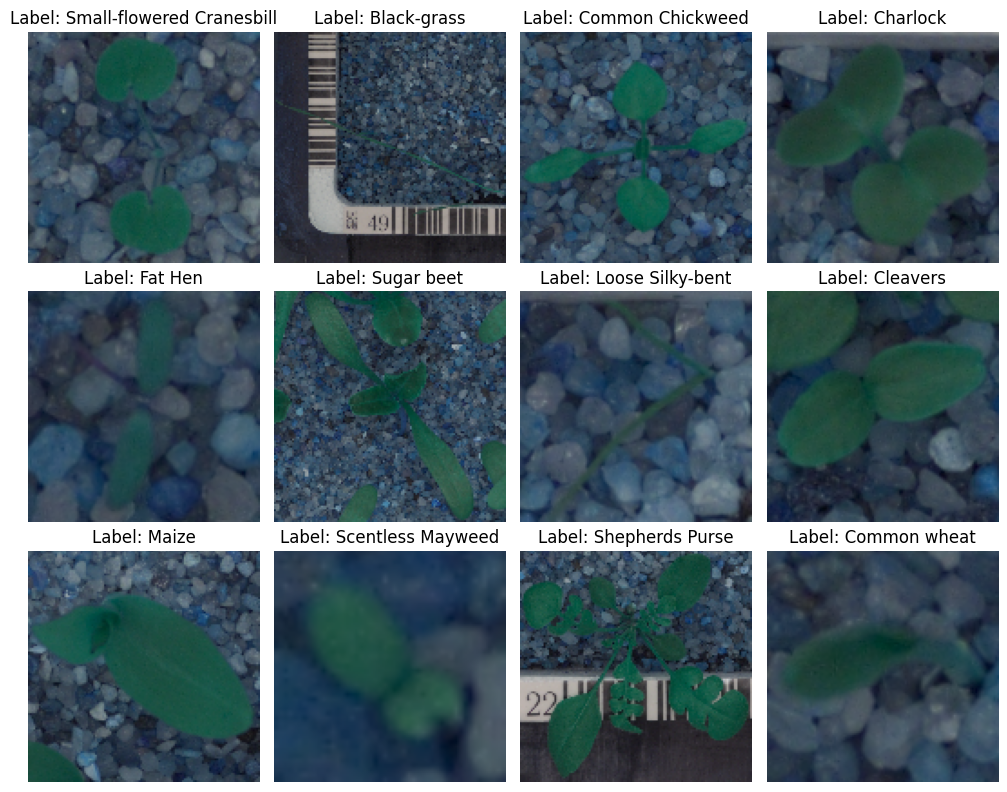

In [8]:
# Extracting list of distinct labels.
label_ids=labels['Label'].values

# Display one random image for each label in a 3x4 grid
rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(10,8))

# Track which labels have been displayed
displayed_labels = set()

for ax in axes.flatten():
    # Select a random label that hasn't been displayed yet
    while True:
        random_index = np.random.randint(len(label_ids))
        label = label_ids[random_index]
        if label not in displayed_labels:
            displayed_labels.add(label)
            break

    # Find all images with the selected label
    images_with_label = [idx for idx, lbl in enumerate(label_ids) if lbl == label]
    
    # Pick a random image with the selected label
    random_image_index = np.random.choice(images_with_label)
    image = images[random_image_index]
    
    # Display the image
    ax.imshow(image)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Observations
* We can visually look at the plant images to distinguish the plants from each other based on their features.
* Just like a Neural Network would do when presented with these digitized images to learn from i.e. identifying patterns associated with labels.
* We can see that even though it is easier to tell apart most of the different plants.
* However, there definitely seems to be some varieties of plants which look very similar.
* This is why it takes eye of an expert who has seen these plants for years, to identify which plant is which exactly.
* Amazing thing is the same level of knowledge can be acquired by the CNN model in a matter of minutes.

### Checking the distribution of Target variables

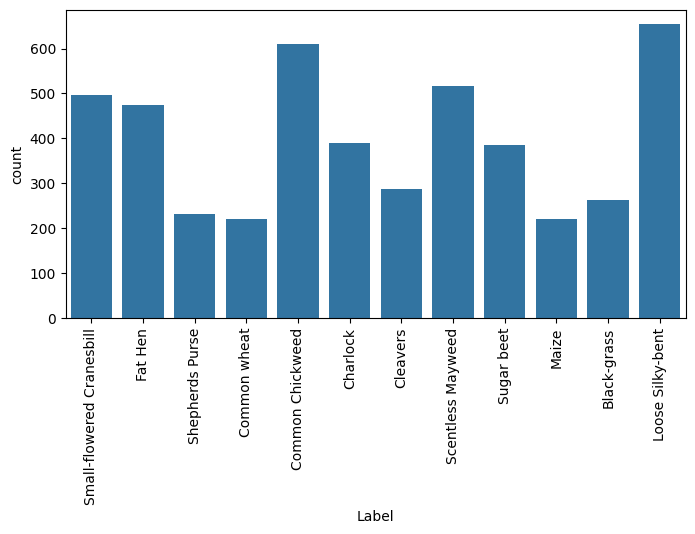

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical');

#### Observations
* The data looks pretty **balanced** and even though there are some labels having higher count than others, no label is monopolizing the distribution.
* That being said, the mostly found variety of the plant is the Loose ***Silky-bent***, followed by ***Common Chickweek***.
* One of the least found plants include ***Common wheat*** & ***Shepherds Purse***.
* In this scenario, **accuracy** would be a good measure of **model performance & tuning**.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [10]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [11]:
resized_images=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  resized_images.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

#### Image before resizing

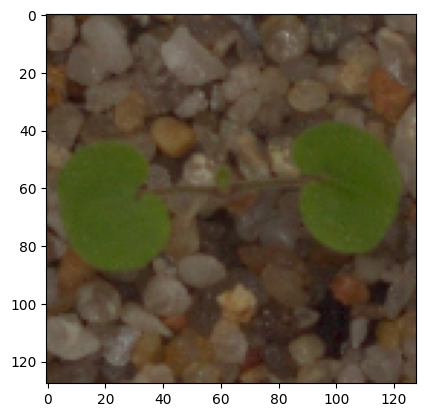

In [12]:
plt.imshow(images[0])

#### Image after resizing

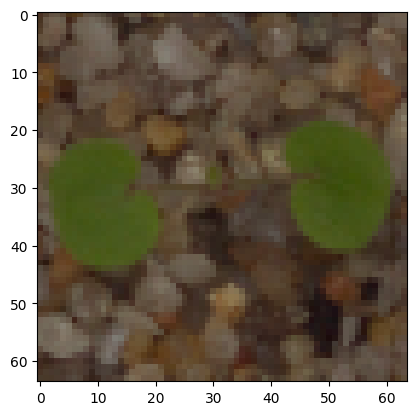

In [13]:
plt.imshow(resized_images[0])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to **split the data into train, test, and validation** to be able to evaluate the model that you build on the train data
- You'll have to **encode categorical** features and scale the pixel values.
- You will **build a model** using the train data and then check its performance

#### Split the dataset

* Since we only have under 5k images in total & since we more images to train a CNN, we can keep the split of 80:10:10
    * With 80% of data used for training.
    * 10% of data used to evaluate the performance while tuning the model.
    * 10% of data used to test the performance of the final model on unseen data.

In [14]:
# Splitting the input data into 90% temp data & 10% test data
X_temp, X_test, y_temp, y_test = train_test_split(
	np.array(resized_images), labels , test_size=0.1, random_state=42, stratify=labels
)

# Splitting the temp data into 90% train data & 10% validation data
X_train, X_val, y_train, y_val = train_test_split(
	X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp
)

* Let's look at the shape of the split data

In [15]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


#### Observations
* We can see that we now have **3847** images for training the model.
    * Which now has **64x64** pixels instead of **128x128**, still with **3** channel color images.
* **428** images for evaluating the performance of the **evolving models**.
* **475** images for testing the **final model** predictions on unseen data.

#### Encode the target labels

In [16]:
# Let's encode the target variables for train, validation & test datasets
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

* Let's look at the shape of the split data

In [17]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3847, 12)
(428, 12)
(475, 12)


#### Data Normalization

In [18]:
# Normalizing the image pixels to get values between 0 & 1
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

* **Data Normalization** is done to reduce the complexity of processing high numeric values.
* It is also done to avoid the problem of **exploding or vanishing gradients**.

## Model Building

In [19]:
# Clearing backend
backend.clear_session()

In [20]:
# Fixing the seed for random number generators to be able to reproduce the same results every time we run the code
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [21]:
# Intializing a Sequential model1
model1 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding remaining Convolution filters & Max Pooling filters to extract more features
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model1
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model1
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          

#### Observations

* This is the **first model** we are building using the available images, **before** we utilize **data augmentations** or any **pre-trained models** to improve performance.
* We can see that even after adding multiple **convolutional** & **pooling** layers as well, with filters ranging from **128** to **32**, the number of trainable parameters is only around **128k**.
* In the **Dense** layer followed by the **Flatten** layer, a dropout of **0.3** is added, which will result in **30% dropout rate**.
    * This will help **prevent overfitting** by randomly dropping 30% of the units in the dense layer during training.
* **Optimizer** being used for this model is **Adam**.
* Since this is a **multi-class classification** problem, we used the **categorical_crossentropy** loss function.
* Metric of choice is **accuracy**, as the data distribution of the target variable is pretty **balanced**.
* **All layers** prior to the output layer uses **relu** as the activation function to introduce non-linearity into the model learning.
* However, **output layer** utilizes **softmax** as the activation function as we are trying to solve a multi-class classification problem.

#### Fitting the model on Train data

In [22]:
history1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=1
)

Epoch 1/30


121/121 [==============================] - 33s 245ms/step - loss: 2.4515 - accuracy: 0.1149 - val_loss: 2.4303 - val_accuracy: 0.1285
Epoch 2/30
121/121 [==============================] - 26s 216ms/step - loss: 2.3591 - accuracy: 0.1916 - val_loss: 2.0606 - val_accuracy: 0.3481
Epoch 3/30
121/121 [==============================] - 27s 226ms/step - loss: 2.0710 - accuracy: 0.2836 - val_loss: 1.8332 - val_accuracy: 0.3855
Epoch 4/30
121/121 [==============================] - 30s 251ms/step - loss: 1.9412 - accuracy: 0.3179 - val_loss: 1.7550 - val_accuracy: 0.4112
Epoch 5/30
121/121 [==============================] - 26s 216ms/step - loss: 1.8447 - accuracy: 0.3356 - val_loss: 1.7714 - val_accuracy: 0.3949
Epoch 6/30
121/121 [==============================] - 25s 205ms/step - loss: 1.7911 - accuracy: 0.3429 - val_loss: 1.5845 - val_accuracy: 0.4416
Epoch 7/30
121/121 [==============================] - 25s 207ms/step - loss: 1.7634 - accuracy: 0.3574 - val_loss: 1.5304 - val_

#### Observations
* Here, we are **fitting our first model** (model1) onto the **training data**, so that it learns from the data and **adjusts its weights** to learn features distinguishing each plant against their label.
* However, we didn't use the originally loaded images as is. Instead, we performed preprocessing before the Model building including:
    * **Resized** the image from 128x128 to **64x64**, to reduce the number of trainable parameters while retaining enough information.
    * Input image data was **normalized** by dividing the pixel value by 255, so as to bring the value between 0 & 1 to **prevent exploding / vanishing gradient**.
    * Label data (**target variable**) was **encoded** to enable **multi-class classification** easily.
* **epochs=30** signifies that the model will learn over **30 iterations** from all the data in the training dataset.
* **batch_size=32** signifies that in **each batch the Model will use 32 images / labels** for learning.
* Here, we can see that the both loss & val_loss seems to have dropped from around 2.3 to 1, while the accuracy scores went up.
    * However, the **maximum accuracy & val_accuracy** we could achieve over **30 epochs** using the limited amount of data we had to learn, was **59.68 & 67.76** respectively, which isn't really that great.

#### Evaluating the Model Performance on Train & Validation data

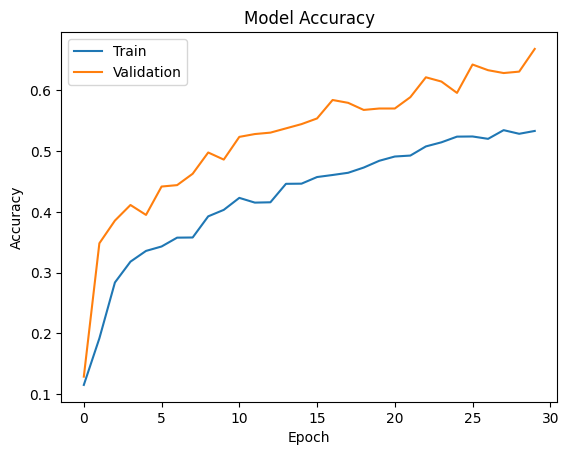

In [23]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluating the Model Performance on Test data

In [24]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1316 - accuracy: 0.6589 - 465ms/epoch - 31ms/step


#### Observations
* Even on the test data, we could only achieve an accuracy of 67.37.

#### Plotting the Confusion Matrix

In [25]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 1s 36ms/step


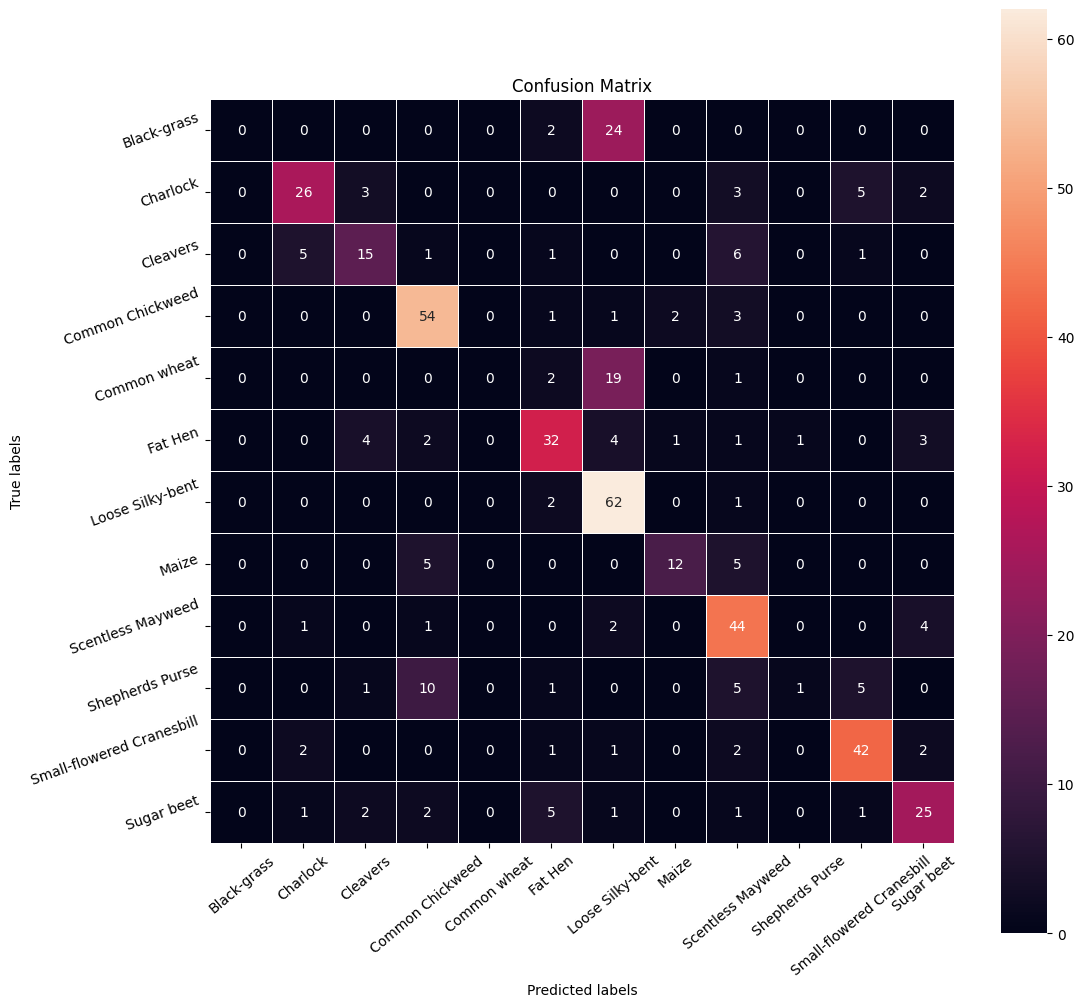

In [26]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations
* We can see that numerous times (**24**) ***Black-grass*** was **incorrectly predicted** as ***Loose Silky-bent***.
* Even ***Common wheat*** was often times (16) **incorrectly predicted** as ***Loose Silky-bent***.
* While ***Loose Silky-bent*** itself was almost always **correctly predicted**.
* Overall, we can see that the **performance isn't great** for this model and it definitely **requires tuning**.

#### Plotting Classification Report

In [27]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.74      0.67      0.70        39
           2       0.60      0.52      0.56        29
           3       0.72      0.89      0.79        61
           4       0.00      0.00      0.00        22
           5       0.68      0.67      0.67        48
           6       0.54      0.95      0.69        65
           7       0.80      0.55      0.65        22
           8       0.61      0.85      0.71        52
           9       0.50      0.04      0.08        23
          10       0.78      0.84      0.81        50
          11       0.69      0.66      0.68        38

    accuracy                           0.66       475
   macro avg       0.56      0.55      0.53       475
weighted avg       0.60      0.66      0.61       475



#### Observations
* As stated before as well, the performance of the model does seem to improve over each epoch, but it still doesn't reach a good number because the **learning data isn't rich enough**.
* This calls for **Transfer Learning** using any of the **pre-trained CNN Models**.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [28]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [29]:
# Clearing backend again before building the next model
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [30]:
# Let's start by rotating the images by a range of 0 - 20 degrees within which the images are randomly rotated
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

### Building **Model 2**, which will be fit on Augmented data

In [31]:
# Intializing a Sequential model2
model2 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding remaining Convolution filters & Max Pooling filters to extract more features
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model2
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model2
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

#### Observations
* We have added a BatchNormalization layer after the Convolutional & Pooling layers
    * This will help with accelerated training and improving the gradient flow.

#### Fitting the new model on Train data
* Let's also increase the batch size from 32 to 64

In [32]:
history2 = model2.fit(
            train_datagen.flow(X_train_normalized, y_train_encoded,
			batch_size=64,
			shuffle=False),
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            steps_per_epoch=X_train_normalized.shape[0] // 64,
            verbose=1,
			callbacks=[learning_rate_reduction]
)

Epoch 1/30
60/60 [==============================] - 23s 350ms/step - loss: 2.2596 - accuracy: 0.2199 - val_loss: 2.4021 - val_accuracy: 0.2173 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 26s 437ms/step - loss: 1.8627 - accuracy: 0.3785 - val_loss: 2.3173 - val_accuracy: 0.2150 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 26s 428ms/step - loss: 1.6571 - accuracy: 0.4404 - val_loss: 2.1731 - val_accuracy: 0.1799 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 27s 451ms/step - loss: 1.4699 - accuracy: 0.4978 - val_loss: 2.0412 - val_accuracy: 0.3224 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 25s 418ms/step - loss: 1.3563 - accuracy: 0.5369 - val_loss: 1.9850 - val_accuracy: 0.3598 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 25s 417ms/step - loss: 1.2683 - accuracy: 0.5660 - val_loss: 1.7995 - val_accuracy: 0.3949 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 26s 430ms/st

#### Observations
* 

#### Evaluating the Model Performance on Train & Validation data

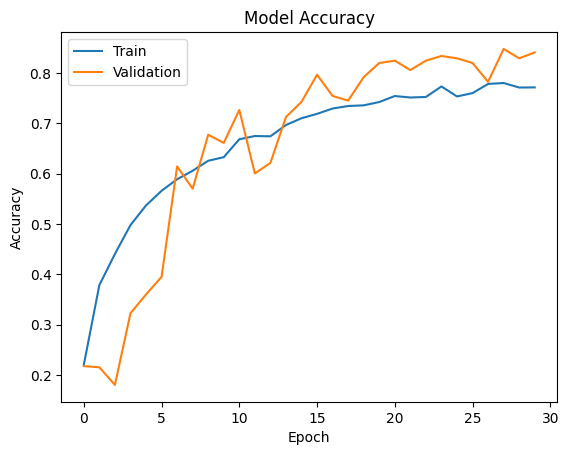

In [33]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluating the Model Performance on Test data

In [34]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.5523 - accuracy: 0.8316 - 619ms/epoch - 41ms/step


#### Observations
* 

#### Plotting the Confusion Matrix

In [35]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 1s 47ms/step


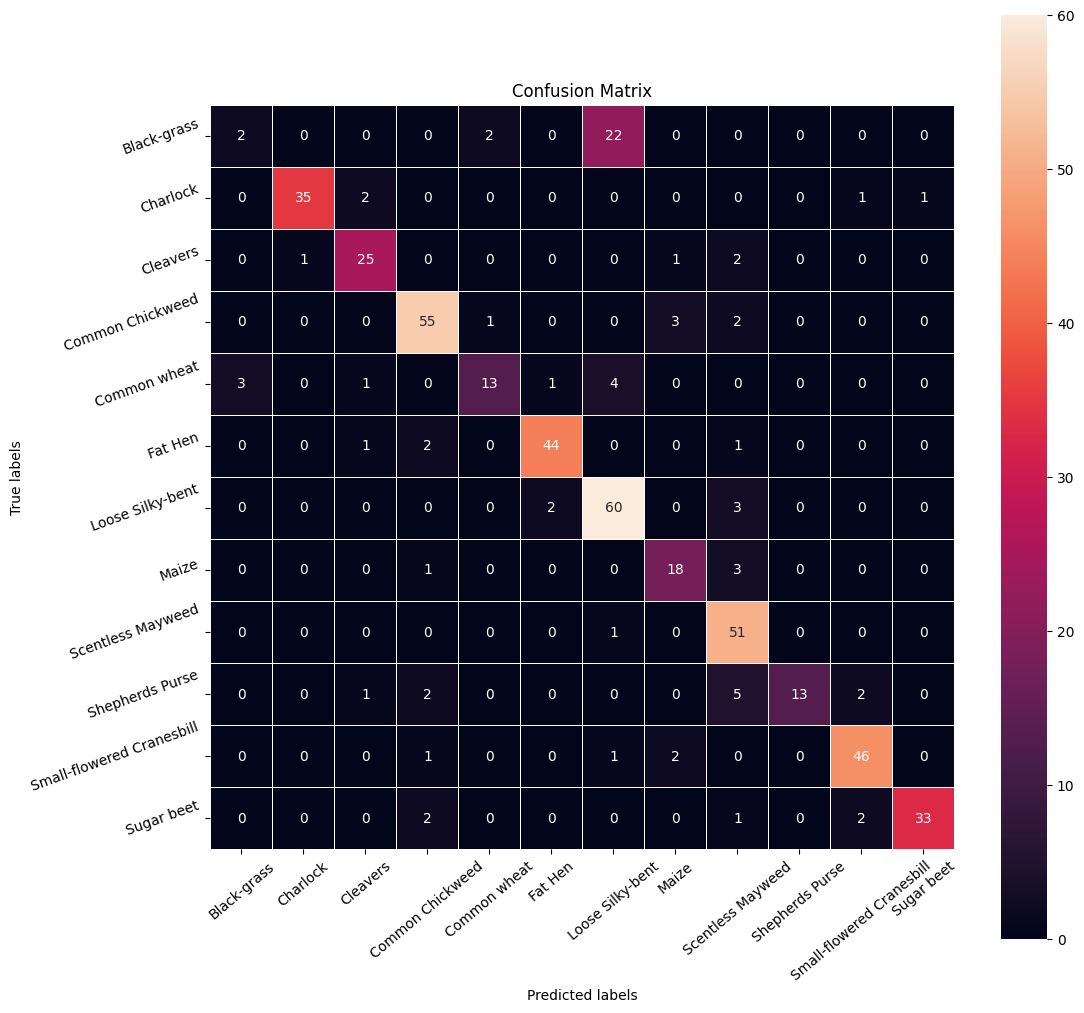

In [36]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations
* 

#### Plotting Classification Report

In [37]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.08      0.13        26
           1       0.97      0.90      0.93        39
           2       0.83      0.86      0.85        29
           3       0.87      0.90      0.89        61
           4       0.81      0.59      0.68        22
           5       0.94      0.92      0.93        48
           6       0.68      0.92      0.78        65
           7       0.75      0.82      0.78        22
           8       0.75      0.98      0.85        52
           9       1.00      0.57      0.72        23
          10       0.90      0.92      0.91        50
          11       0.97      0.87      0.92        38

    accuracy                           0.83       475
   macro avg       0.82      0.78      0.78       475
weighted avg       0.83      0.83      0.82       475



#### Observations
* 

### **Transfer Learning from Pre-Trained Model**

In [38]:
# Clearing backend again before building the next model
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Building **Model 3**, which will be built using Transfer Learning from pre_trained_model

* Lets import all the Convolutional & Pooling layers from pre_trained_model, without importing the Dense layers
* We will create our own Dense fully connected layers to make the predictions on the plants.

In [39]:
# Let's first create an instance of the pre_trained_model
pre_trained_model = ResNet50(weights='imagenet', include_top = False, input_shape = (224,224,3))
pre_trained_model.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

 conv2_block2_out (Activati  (None, 56, 56, 256)          0         ['conv2_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)   

                                                                                                  
 conv3_block2_2_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block3_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block2_out[0][0]',    
                                                                     'conv4_block3_3_bn[0][0]']   
                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_blo

 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
          

In [40]:
# Now, let's make all the layers in pre_trained_model non-trainable, so that we can use the weights learned from this model as is, without further training it again
for layer in pre_trained_model.layers:
    layer.trainable = False

In [41]:
# Let's check if the pre_trained_model layers have become untrainable. Otherwise, this would need a lot of compute power to train again.
for layer in pre_trained_model.layers:
    print(layer.name, layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

#### Build Model using Transfer Learning

In [42]:
# Intializing a Sequential model3
model3 = Sequential()

# Add a resizing layer to resize the input images to 224x224, as our current reduced image size is 64x64 & VGG only accepts 224x224 input images
model3.add(Input(shape=(64, 64, 3)))
model3.add(Resizing(224, 224))

# Lets import the non-trainable layers from pre_trained_model to use its weights as is
model3.add(pre_trained_model)

# Since all the convolutions & pooling layers are imported from VGG, we will not do any further convolutions.

# flattening the output of the transferred VGG model's convolutional & pooling layers
model3.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model3
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model3
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 16)                1605648   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
Total params: 25193564 (96.11 MB)
Trainable params: 1605

#### Observations
* We have added a BatchNormalization layer after the Convolutional & Pooling layers
    * This will help with accelerated training and improving the gradient flow.

#### Fitting the new model on Train data
* Let's also increase the batch size from 32 to 64

In [43]:
history3 = model3.fit(
            train_datagen.flow(X_train_normalized, y_train_encoded,
			batch_size=64,
			shuffle=False),
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            steps_per_epoch=X_train_normalized.shape[0] // 64,
            verbose=1,
			callbacks=[learning_rate_reduction]
)

Epoch 1/30
60/60 [==============================] - 317s 5s/step - loss: 2.6383 - accuracy: 0.1306 - val_loss: 2.4742 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 321s 5s/step - loss: 2.4692 - accuracy: 0.1359 - val_loss: 2.4639 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 324s 5s/step - loss: 2.4600 - accuracy: 0.1383 - val_loss: 2.4559 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 342s 6s/step - loss: 2.4522 - accuracy: 0.1372 - val_loss: 2.4489 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - ETA: 0s - loss: 2.4451 - accuracy: 0.1380
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 [==============================] - 326s 5s/step - loss: 2.4451 - accuracy: 0.1380 - val_loss: 2.4430 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 326s 5s/step - loss

KeyboardInterrupt: 

#### Evaluating the Model Performance on Train & Validation data

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluating the Model Performance on Test data

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

#### Observations
* 

#### Plotting the Confusion Matrix

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations
* 

#### Plotting Classification Report

In [ ]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

#### Observations
* 

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

## Actionable Insights and Business Recommendations

*

_____